데이터 거래사

데이터 바우쳐 사업

비용의 80% 지원

kt 핸드폰 특정지역 트랜잭션 데이터 7천만원

데이터 안심구역 - 그 지역에서는 데이터 무료로 데이터 얻을수있음

https://dsz.kdata.or.kr/svc/main/main.do

데이콘, 캐글, 데이터 안심구역, ai hub

프로젝트의 성공을 위해 데이타 가용성이 뒷받침되어야 함

자신의 도메인 분야부터 데이터 접근해서 생활화, 습관화

데이터 거래사 : http://datatrade.kodia.kr/



Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
#전처리 필수
#hp 숫자로 변화
#unique로 확인

# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

#데이터 타입 변경


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/auto-mpg.csv'
#차 이름을 인덱스로 만들어서 읽기
df = pd.read_csv(file_path, index_col='car name')
print(df.head())

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


KeyError: "None of [Index(['horsepower'], dtype='object')] are in the [columns]"

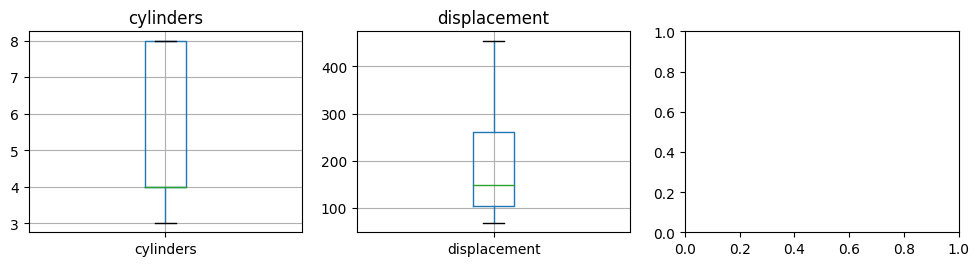

In [ ]:
num_columns = len(df.columns)
plt.figure(figsize=(12,12))

for i, column in enumerate(df.columns):
    plt.subplot(4,3, i+1)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

# KeyError: "None of [Index(['horsepower'], dtype='object')] are in the [columns]"
#Index(['horsepower'], dtype='object') dtype='object'라서 박스 플롯 불가

In [ ]:
df['horsepower'] = df['horsepower'].astype(float)
#ValueError: could not convert string to float: '?'
#숫자로 형변환 불가 '?'라서

ValueError: could not convert string to float: '?'

In [ ]:
df[df['horsepower'] == '?']
#어떤 행에 ?있는지 확인
#총398행중 6개 행에 물음표 존재 이정도 비율은 제외해도 무방하다고 판단.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford pinto,25.0,4,98.0,?,2046,19.0,71,1
ford maverick,21.0,6,200.0,?,2875,17.0,74,1
renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
renault 18i,34.5,4,100.0,?,2320,15.8,81,2
amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


KeyError: "None of [Index(['horsepower'], dtype='object')] are in the [columns]"

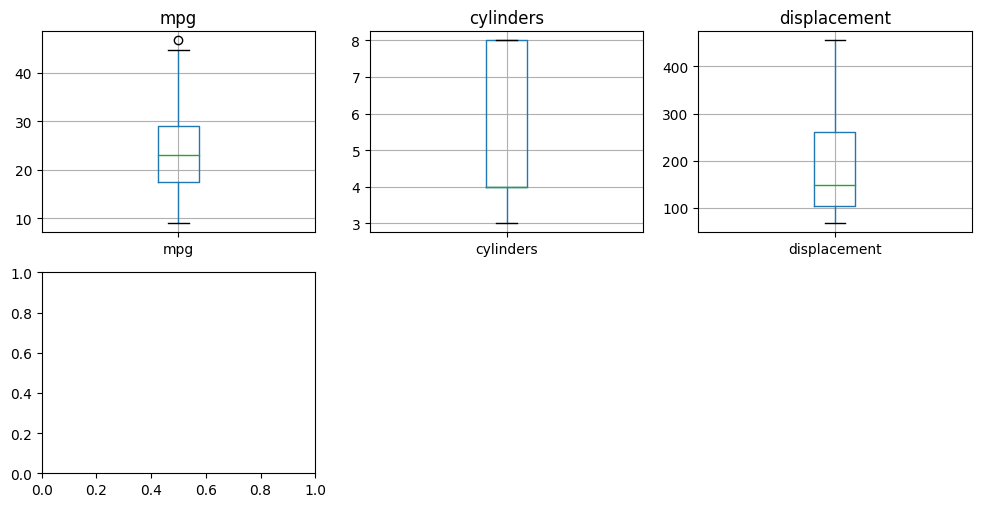

In [ ]:
df = df.replace('?', np.nan)
num_columns = len(df.columns)
plt.figure(figsize=(12,12))

for i, column in enumerate(df.columns):
    plt.subplot(4,3, i+1)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

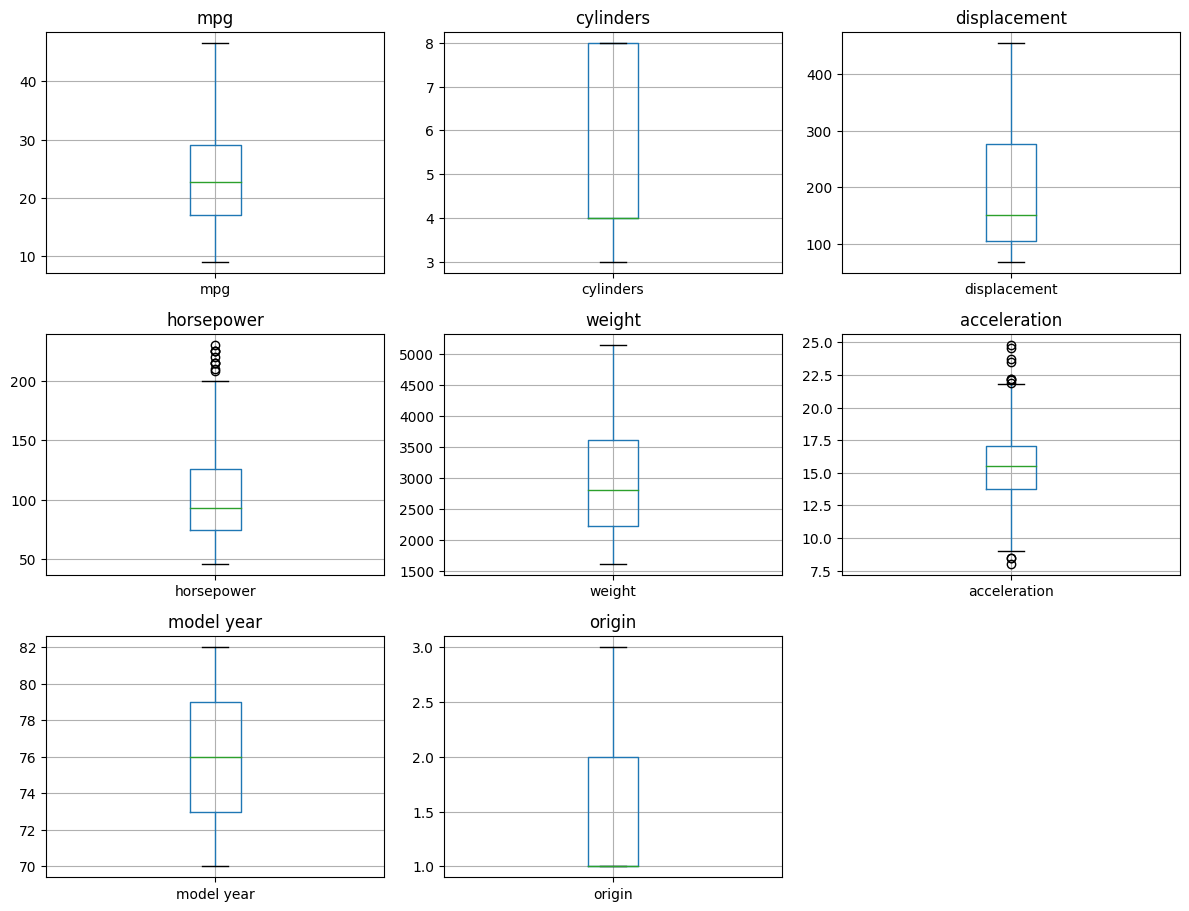

In [3]:
#물음표 np.nan으로 바꾸고 nan행 삭제
#그리고 마력 형변환 시행후 박스 플롯 수
df = df.replace('?', np.nan)
df = df.dropna()
df['horsepower'] = df['horsepower'].astype(float)

num_columns = len(df.columns)
plt.figure(figsize=(12,12))

for i, column in enumerate(df.columns):
    plt.subplot(4,3, i+1)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

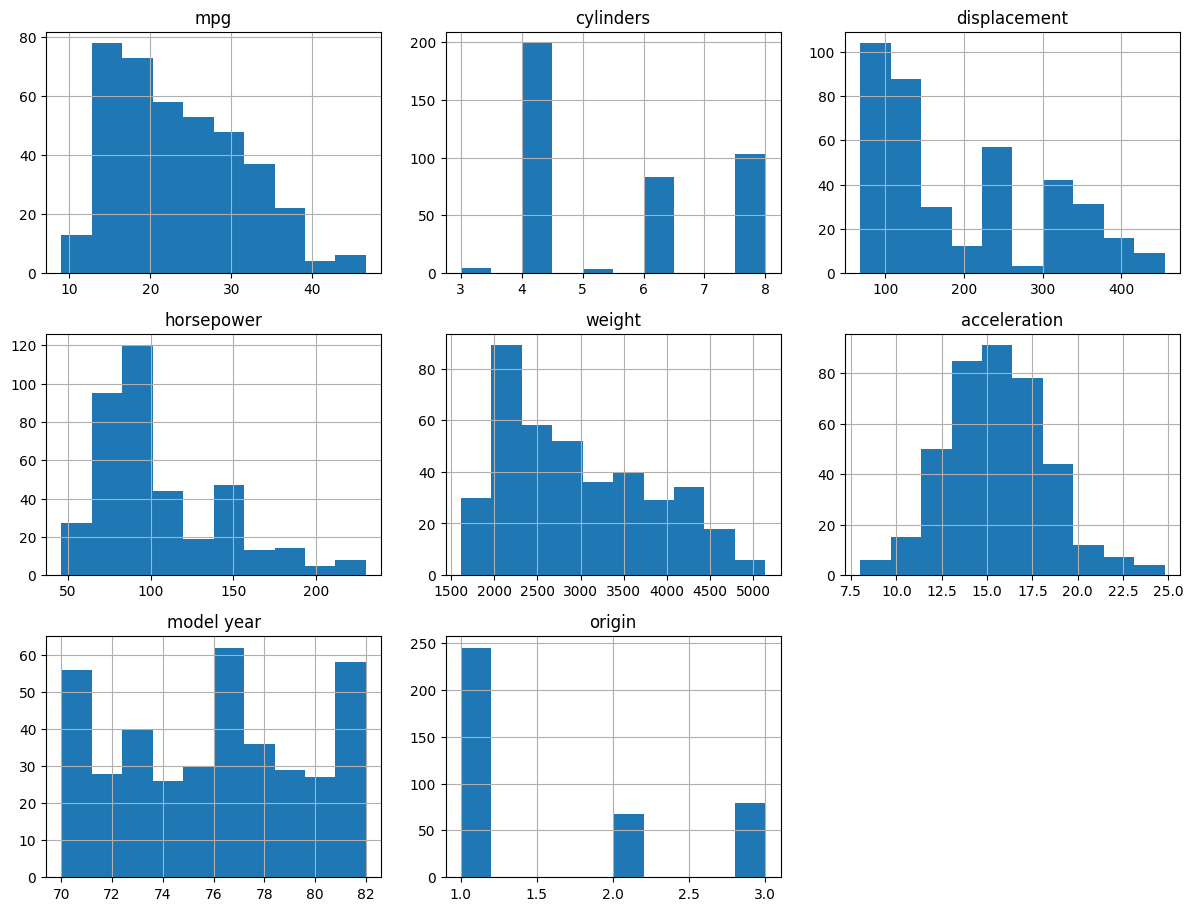

In [6]:
num_columns = len(df.columns)
plt.figure(figsize=(12, 12))

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    df[column].hist()
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df.corr()
target_variable = 'mpg'
correlation_threshold = 0.5
cm=correlation_matrix[[target_variable]][abs(correlation_matrix[target_variable])> correlation_threshold].index.tolist()
print(f"Variables highly correlatied with {target_variable}: {cm}")

Variables highly correlatied with mpg: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']


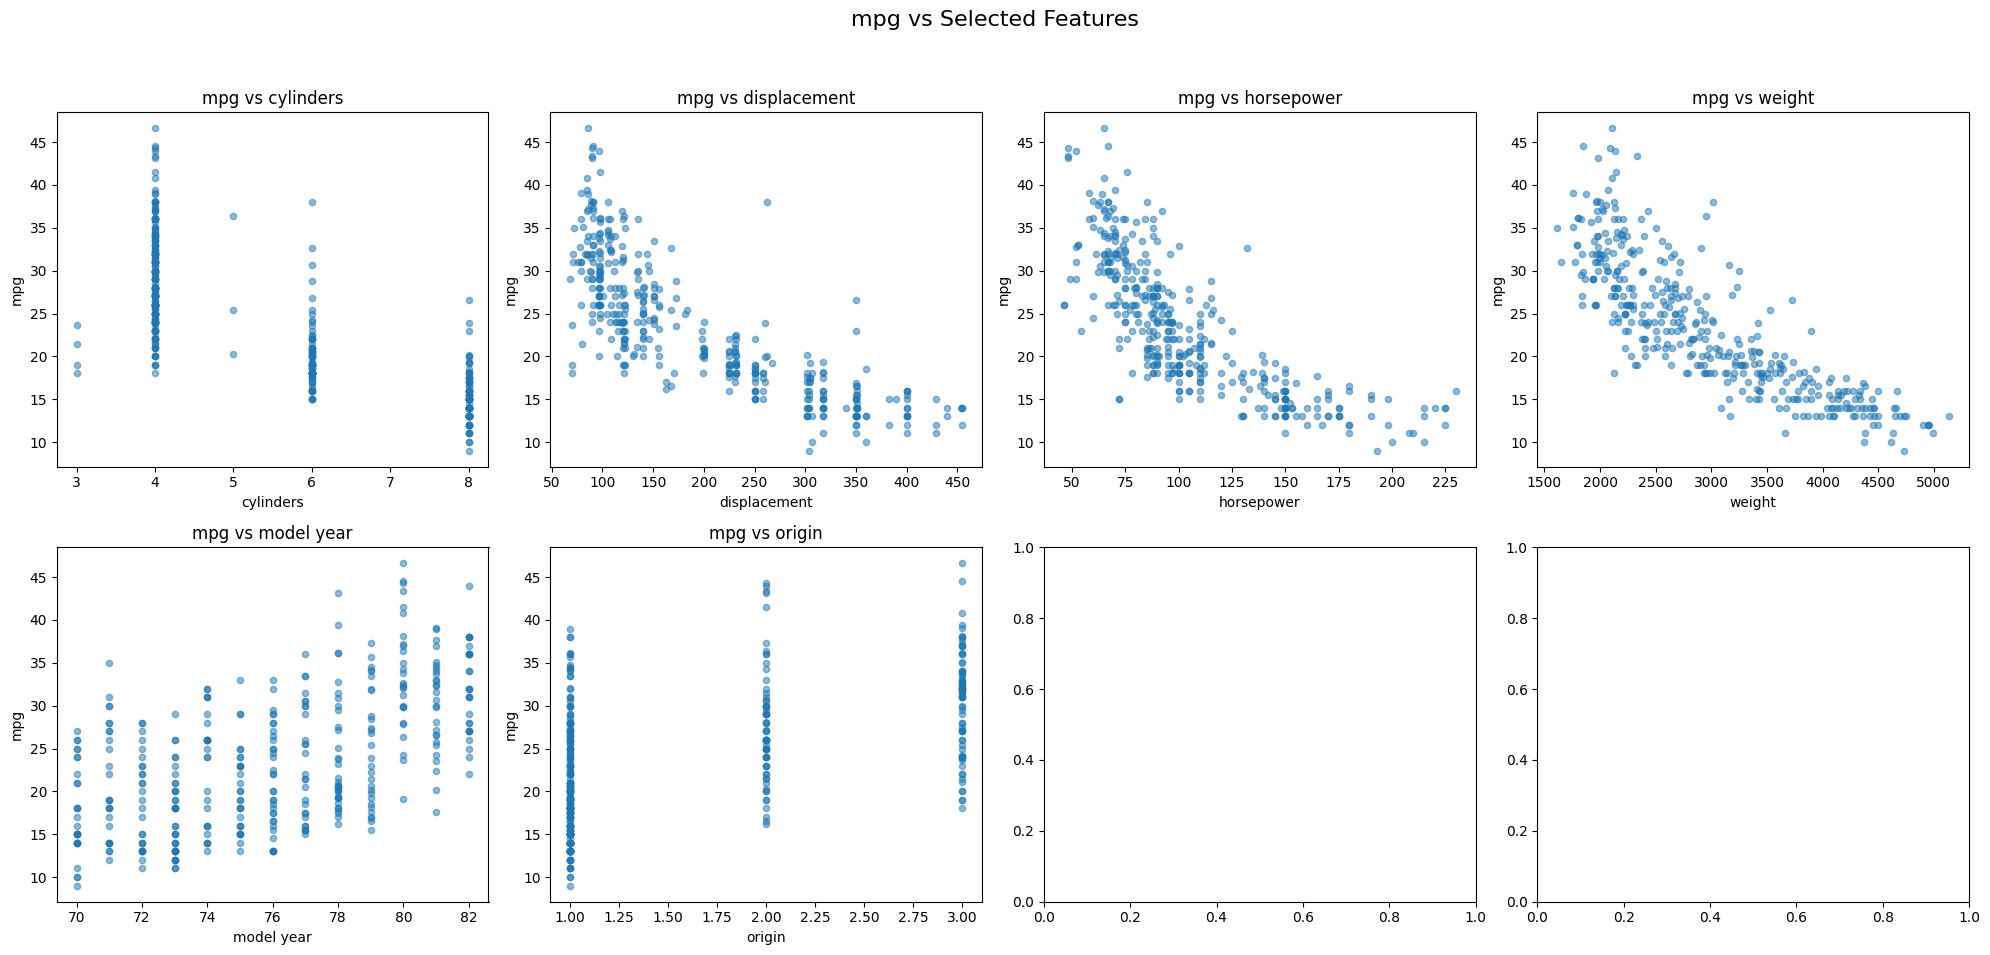

In [ ]:
target = 'mpg'
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']
# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 각 subplot에 산점도 그리기
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 4)
    df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

# 전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

correlated_features = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           model year  origin  
car name                                       
chevrolet chevelle malibu          70       1  
buick skylark 320                  70       1  
plymouth satellite                 70       1  
amc rebel sst                      70       1  
ford torino                        70       1  
   cylinders  displacement  horsepower    weight  model year    origin   mpg
0   1.483947      1.077290

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 10.76
Root Mean Squared Error: 3.28
R-squared: 0.79


In [ ]:
from itertools import combinations

target = 'mpg'
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# 모든 조합을 저장할 리스트
all_combinations = []

# 1개부터 len(columns)까지의 조합을 생성
for i in range(1, len(columns) + 1):
    for combo in combinations(columns, i):
        # target을 포함한 조합을 리스트에 추가
        all_combinations.append([target] + list(combo))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score


def calc_r2(target_variable):
    # 회귀 모델 구축
    X = scaled_df.drop(columns=[target_variable])
    y = scaled_df[target_variable]

    # 훈련/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 선형 회귀 모델 훈련
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 모델 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # print(f"Mean Squared Error: {round(mse,2)}")
    # print(f"Root Mean Squared Error: {round(rmse,2)}")
    print(f"R-squared: {round(r2,2)}")


for i in all_combinations:
    correlated_features = i
    analysis_df = df[correlated_features]
    target_variable = 'mpg'
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

    # 표준화된 데이터를 데이터프레임으로 변환
    scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
    scaled_df[target_variable] = analysis_df[target_variable].values
    calc_r2(target_variable)

R-squared: 0.57
R-squared: 0.58
R-squared: 0.57
R-squared: 0.65
R-squared: 0.21
R-squared: 0.27
R-squared: 0.28
R-squared: 0.59
R-squared: 0.62
R-squared: 0.65
R-squared: 0.57
R-squared: 0.72
R-squared: 0.57
R-squared: 0.6
R-squared: 0.64
R-squared: 0.58
R-squared: 0.71
R-squared: 0.59
R-squared: 0.65
R-squared: 0.56
R-squared: 0.68
R-squared: 0.6
R-squared: 0.65
R-squared: 0.79
R-squared: 0.65
R-squared: 0.39
R-squared: 0.42
R-squared: 0.44
R-squared: 0.61
R-squared: 0.64
R-squared: 0.59
R-squared: 0.72
R-squared: 0.59
R-squared: 0.65
R-squared: 0.62
R-squared: 0.74
R-squared: 0.63
R-squared: 0.65
R-squared: 0.79
R-squared: 0.65
R-squared: 0.71
R-squared: 0.58
R-squared: 0.7
R-squared: 0.65
R-squared: 0.6
R-squared: 0.72
R-squared: 0.61
R-squared: 0.65
R-squared: 0.79
R-squared: 0.64
R-squared: 0.71
R-squared: 0.59
R-squared: 0.7
R-squared: 0.65
R-squared: 0.79
R-squared: 0.65
R-squared: 0.68
R-squared: 0.59
R-squared: 0.7
R-squared: 0.79
R-squared: 0.66
R-squared: 0.78
R-squared: 0.5

파라미터: 기계가 찾아주는 값

하이퍼 파라미터 : 사용자가 찾기

극한의 학습은 과적합으로 감

챗gpt에게 가이드를 주면서 진행



In [7]:
#ex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)



Saving auto-mpg.csv to auto-mpg.csv


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [50]:
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
df['hp_to_weight'] = df['horsepower'] / df['weight']

In [51]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [52]:
df.drop(columns='car name', inplace=True)
df

KeyError: "['car name'] not found in axis"

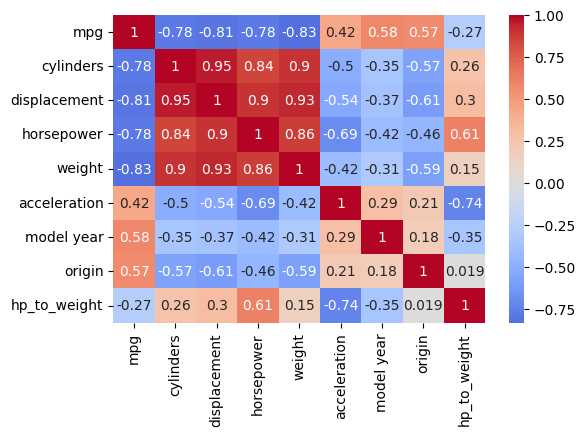

In [53]:
#탐색적 데이터 분석
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [54]:
#변수 선정(상관계수 기반)

target_variable = 'mpg'
correlation_threshold = 0.5
correlatied_features=correlation_matrix[[target_variable]][abs(correlation_matrix[target_variable])> correlation_threshold].index.tolist()

#파생변수 생성: 중량 대비 마력비
#파생변수는 이렇게 만든다. 도메인 지식이 있는 경우 좋은 파생변수 만들수 있다.
#상관계수가 높지는 않음

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


In [55]:
analysis_df = df[correlatied_features]
print(analysis_df)
target_variable = 'mpg'
# 데이터 표준화
scaler = StandardScaler()
#mpg제거후 전체 표준화
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))
#배열 형태로 저장

# 표준화된 데이터를 데이터프레임으로 변환 - 배열을 다시 데이터프레임 형태로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
# 다시 mpg  추가
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

      mpg  cylinders  displacement  horsepower  weight  model year  origin
0    18.0          8         307.0       130.0    3504          70       1
1    15.0          8         350.0       165.0    3693          70       1
2    18.0          8         318.0       150.0    3436          70       1
3    16.0          8         304.0       150.0    3433          70       1
4    17.0          8         302.0       140.0    3449          70       1
..    ...        ...           ...         ...     ...         ...     ...
393  27.0          4         140.0        86.0    2790          82       1
394  44.0          4          97.0        52.0    2130          82       2
395  32.0          4         135.0        84.0    2295          82       1
396  28.0          4         120.0        79.0    2625          82       1
397  31.0          4         119.0        82.0    2720          82       1

[392 rows x 7 columns]
   cylinders  displacement  horsepower    weight  model year    origin   mpg

In [56]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    float64
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   model year    392 non-null    float64
 5   origin        392 non-null    float64
 6   mpg           392 non-null    float64
dtypes: float64(7)
memory usage: 21.6 KB


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)     #fit- 학습을 하는 함수

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred) #제곱으로 오차 산정
rmse = np.sqrt(mse) #오차 제곱근으로 줄여듬
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
#r2는 분산을 기준으로 점수 평가, 정확한 평가 지수는 아님, 참고로 사용
#지도 학습 - 문제와 답을 제공해서 학습, 학습에 대한 일반화 성능을 테스트 해야함
#그래서 훈련과 테스트용으로 데이터 분리

Mean Squared Error: 10.76426342573444
Root Mean Squared Error: 3.280893693147408
R-squared: 0.7891038318440105
